In [10]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
# Load data while skipping metadata rows
df = pd.read_csv("../data/raw/GOOG.csv", skiprows=2, parse_dates=["Date"])

# Set index
df.set_index("Date", inplace=True)

# Rename columns
df.columns = ["Close", "High", "Low", "Open", "Volume"]

# Check result
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,15.536651,15.605068,15.474429,15.541608,78541293
2010-01-05,15.468232,15.563670,15.407498,15.547309,120638494
2010-01-06,15.078298,15.514588,15.031198,15.514588,159744526
2010-01-07,14.727282,15.121431,14.691337,15.106557,257533695
2010-01-08,14.923613,14.954103,14.603584,14.675224,189680313


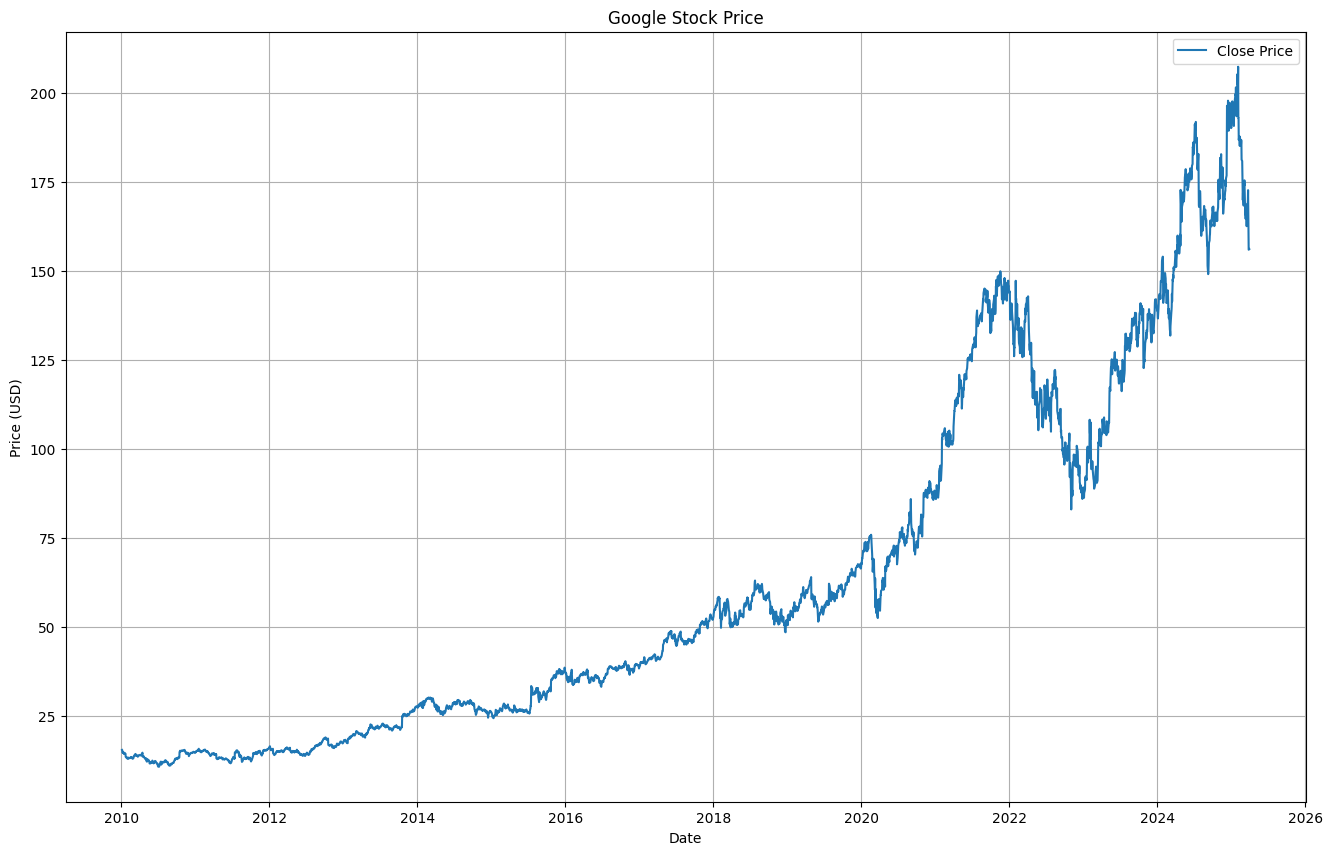

In [16]:
plt.figure(figsize=(16, 10))
plt.plot(df["Close"], label="Close Price")
plt.title("Google Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

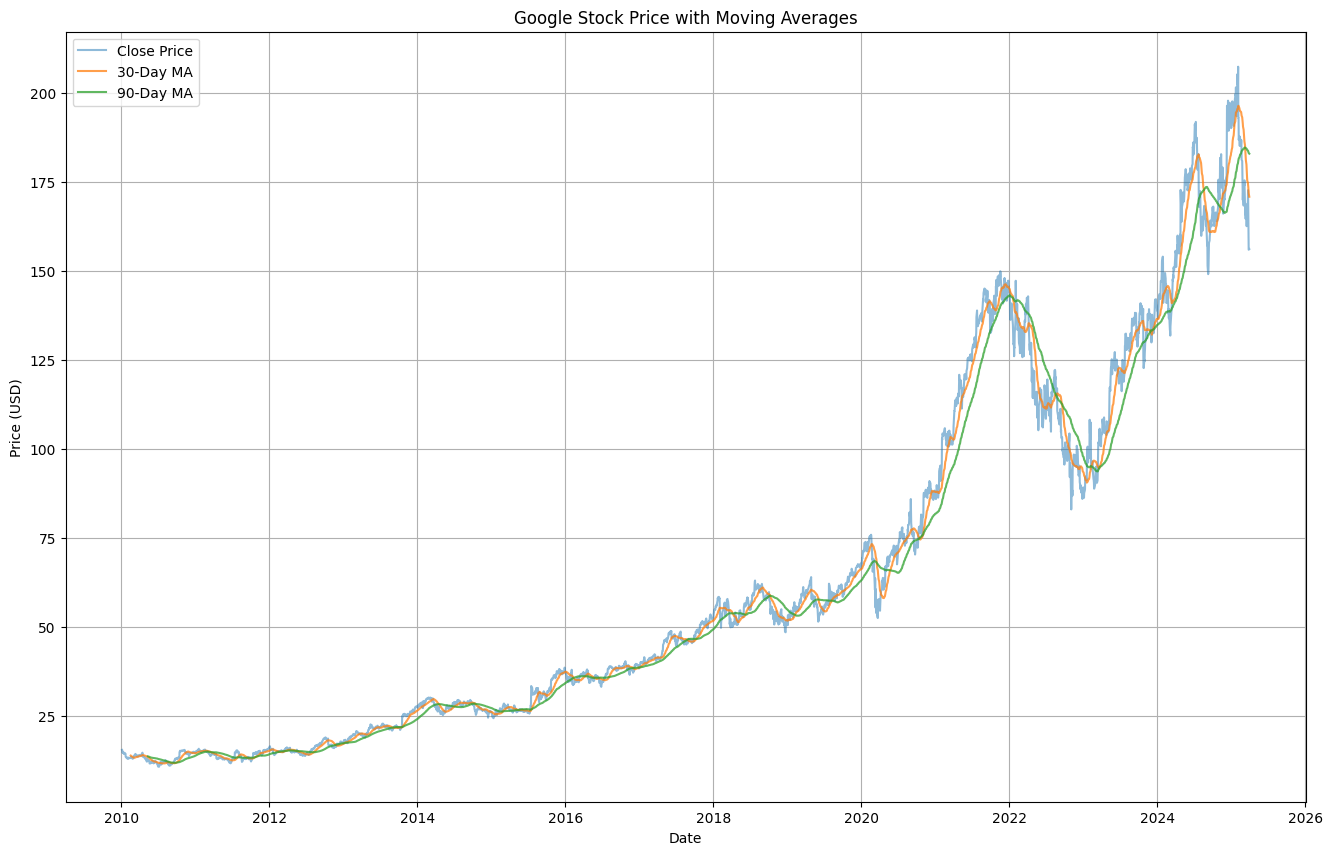

In [18]:
# PLot moving averages (trend detection)

df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_90'] = df['Close'].rolling(window=90).mean()

plt.figure(figsize=(16, 10))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['MA_30'], label='30-Day MA', alpha=0.75)
plt.plot(df['MA_90'], label='90-Day MA', alpha=0.75)
plt.title('Google Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

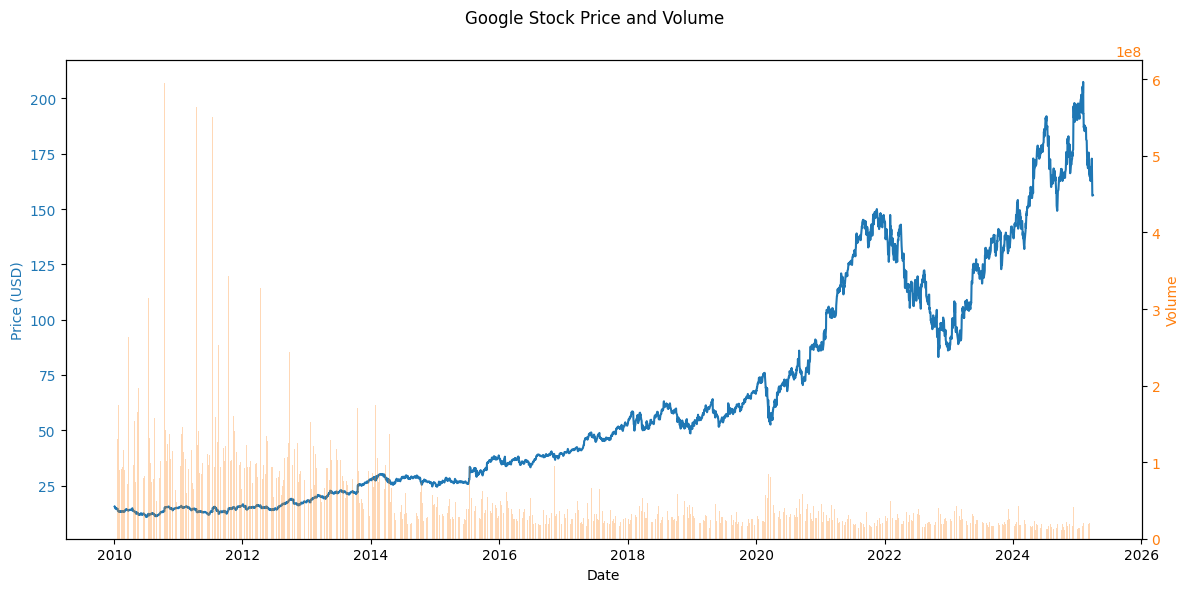

In [20]:
# Plot volume vs price

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='tab:blue')
ax1.plot(df.index, df['Close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:orange')
ax2.bar(df.index, df['Volume'], color='tab:orange', alpha=0.3, label='Volume')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.suptitle('Google Stock Price and Volume')
fig.tight_layout()
plt.show()

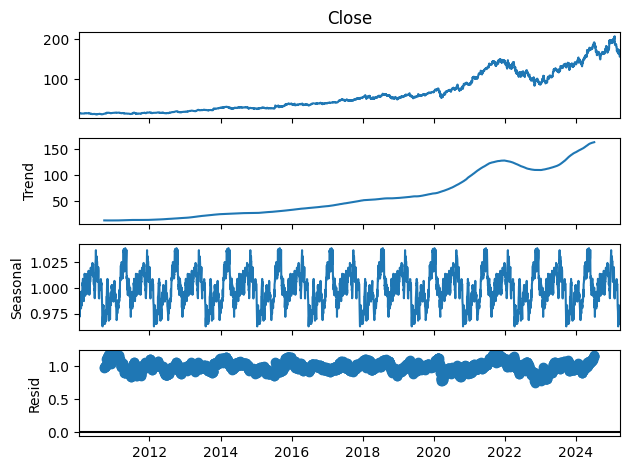

In [21]:
# decompose time series
result = seasonal_decompose(df['Close'], model='multiplicative', period=365)
result.plot()
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -0.006927860364295793
p-value: 0.9579553931588651


In [23]:
df_diff = df['Close'].diff().dropna()

# ADF Test again on differenced data
from statsmodels.tsa.stattools import adfuller
result_diff = adfuller(df_diff)

print(f"ADF Statistic (diff): {result_diff[0]}")
print(f"p-value (diff): {result_diff[1]}")


ADF Statistic (diff): -10.4539569955977
p-value (diff): 1.4144595481484795e-18
